In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import glob

In [4]:
def get_vals_for_metric(metric, files):
  xs = []
  vals = []
  for f in sorted(files, key=lambda x: int(x.split("/")[-2].split("-")[1])):
    xs.append(int(f.split("/")[-2].split("-")[1]))
    results = json.load(open(f))
    vals.append(results["best_edits"][metric])
  return xs, vals

def get_metrics_for_model(model_name):
  path = f"/home/anton/github/autoseg/src/autoseg/artifacts/{model_name.replace(' ', '_')}/results"
  files = glob.glob(path + "/step-*/result.json")
  for f in files:
    if "step-0" in f:
      files.remove(f)
  print(files)

  xs, merges = get_vals_for_metric("total_merges_needed_to_fix_splits", files)
  _, splits = get_vals_for_metric("total_splits_needed_to_fix_merges", files)
  skel_mods = np.array(merges) + np.array(splits)
  xs = np.array(xs)

  voi_sum = np.array(get_vals_for_metric("voi_sum", files)[1])
  nvi_sum = np.array(get_vals_for_metric("nvi_sum", files)[1])
  return {
    "checkpoints": xs,
    "merges": merges,
    "splits": splits,
    "skel_mods": skel_mods,
    "voi_sum": voi_sum,
    "nvi_sum": nvi_sum
  }

In [5]:
def compare_models(models, metric):
  for model in models:
    metrics = get_metrics_for_model(model)
    plt.plot(metrics["checkpoints"], metrics[metric], label=model)
  plt.title(metric)
  plt.legend()
  plt.show()

['/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-75000/result.json', '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-200000/result.json', '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-125000/result.json', '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-150000/result.json', '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-25000/result.json', '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-175000/result.json', '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-50000/result.json', '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-100000/result.json']
['/home/anton/github/autoseg/src/autoseg/artifacts/UNet_LSD_2/results/step-75000/result.json', '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_LSD_2/results/step-200000/result.json', '/home/anton

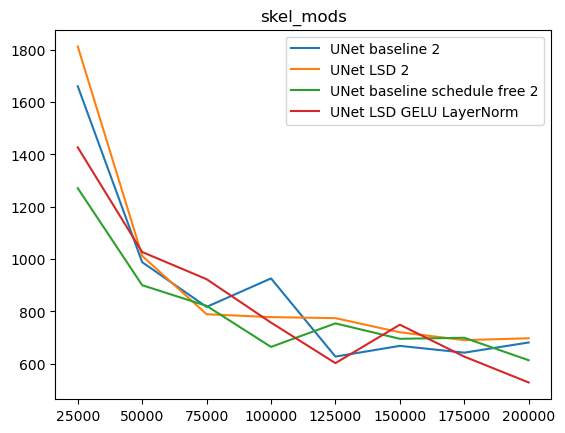

In [6]:
compare_models(["UNet baseline 2", "UNet LSD 2", "UNet baseline schedule free 2", "UNet LSD GELU LayerNorm"], "skel_mods")
#compare_models(["UNet baseline 2", "UNet LSD 2"], "skel_mods")

In [39]:
#model_name = "UNet LSD 2"
model_name = "UNet baseline 2"

In [40]:
path = f"/home/anton/github/autoseg/src/autoseg/artifacts/{model_name.replace(' ', '_')}/results"
files = glob.glob(path + "/step-*/result.json")
files

['/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-75000/result.json',
 '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-200000/result.json',
 '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-125000/result.json',
 '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-0/result.json',
 '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-150000/result.json',
 '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-25000/result.json',
 '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-175000/result.json',
 '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-50000/result.json',
 '/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-100000/result.json']

In [41]:
merges = []
splits = []
checkpoints = []
for f in sorted(files, key=lambda x: int(x.split("/")[-2].split("-")[1])):
  checkpoints.append(f.split("/")[-2].split("-")[1])
  results = json.load(open(f))
  merges.append(results["best_edits"]["total_merges_needed_to_fix_splits"])
  splits.append(results["best_edits"]["total_splits_needed_to_fix_merges"])
  print(f)


/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-0/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-25000/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-50000/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-75000/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-100000/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-125000/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-150000/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-175000/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/UNet_baseline_2/results/step-200000/result.json


In [37]:
(np.array(merges) + np.array(splits))[1:].min()

690

In [42]:
baseline = np.array(merges) + np.array(splits)

In [38]:
lsd = np.array(merges) + np.array(splits)

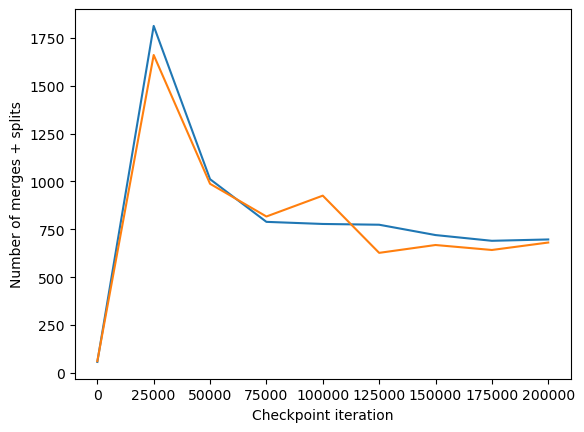

In [43]:
plt.ylabel("Number of merges + splits")
plt.xlabel("Checkpoint iteration")
#plt.title(model_name)
plt.plot(checkpoints, lsd, label="LSD baseline")
plt.plot(checkpoints, baseline, label="Pure Aff baseline")

In [22]:
def plot_metric(metric):
  vals = []
  checkpoints = []
  for f in sorted(files, key=lambda x: int(x.split("/")[-2].split("-")[1])):
    checkpoints.append(f.split("/")[-2].split("-")[1])
    results = json.load(open(f))
    vals.append(results["best_nvi"][metric])
  plt.ylabel(metric)
  plt.xlabel("Checkpoint iteration")
  plt.plot(checkpoints, vals)
  

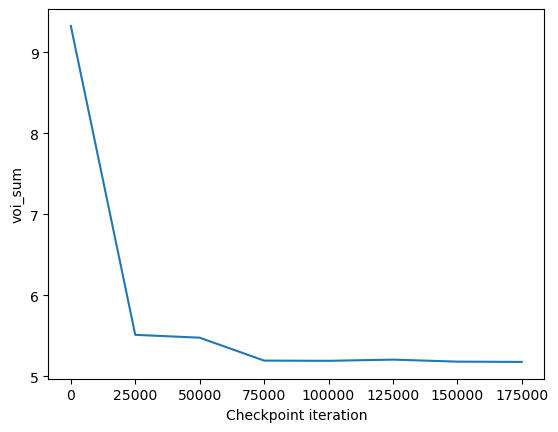

In [25]:
plot_metric("voi_sum")